In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import datetime
import warnings
import time
from sklearn.model_selection import cross_val_score
from catboost import Pool
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X =pd.read_csv('X.csv')
X_test = pd.read_csv('X_test.csv')
Y = pd.read_csv('Y.csv')

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# train_dataset = Pool(data=X_train,
#                      label=y_train)

# eval_dataset = Pool(data=X_test,
#                     label=y_test)

# LGBM = pickle.load(open('LGBMTunedV12', 'rb'))
# XGB = pickle.load(open('XGB_tuned_02.pickle', 'rb'))
# CatBoost = CatBoostClassifier(n_estimators=1500,task_type = "GPU",eval_metric='F1')
# LGBM.fit(X_train,y_train)
# XGB.fit(X_train,y_train)
# CatBoost.fit(train_dataset,use_best_model=True,eval_set=eval_dataset)

# print('début des pred')
# predLGB = LGBM.predict_proba(X_test)
# predXGB = XGB.predict_proba(X_test)
# predCAT = CatBoost.predict_proba(X_test)
#print('f1_score',f1_score(y_test.values.astype(int),pred.astype(int)))

In [111]:
predLGB = pd.DataFrame(predLGB[:,1])
predXGB = pd.DataFrame(predXGB[:,1])
predCAT = pd.DataFrame(predCAT[:,1])

In [113]:
predLGB = predLGB.rename( columns={0: "LGB"})
predXGB = predXGB.rename( columns={0: "XGB"})
predCAT = predCAT.rename( columns={0: "CAT"})

In [114]:
ensemble_pred = pd.concat([predLGB,predXGB,predCAT],axis=1)
ensemble_pred['mean'] = ensemble_pred.mean(axis='columns',numeric_only=True)

In [253]:
exit_coor =pd.read_csv('exit_coor.csv')

In [76]:
y_test = y_test.rename(columns={'0': "pred_true"})

In [222]:
y_pred = np.where(ensemble_pred['XGB'] > 0.5, 1,0)

In [223]:
print('f1_score',f1_score(y_test.values.astype(int),y_pred.astype(int)))

f1_score 0.8842443729903536


In [131]:
#f1_score 0.8869385647909138 all
#f1_score 0.8842443729903536 XGB
#f1_score 0.8876938039933634 LGB
#f1_score 0.8879339979374354 CAT

In [215]:
#X.iloc[76,:]

In [217]:
ensemble_pred.index = y_test.index

In [224]:
preds = pd.concat([y_test,ensemble_pred],axis=1)

In [232]:
preds = preds.sort_index()
X_test = X_test.sort_index()

In [236]:
preds = preds.rename(columns={'0': "pred_true"})
#ligne 24

In [254]:
exit_coor = exit_coor.iloc[X_test.index]

In [236]:
# X_test.to_csv("pres_x_test.csv",index=False)
# preds.to_csv("preds.csv",index=False)
# exit_coor.to_csv("coor.csv",index=False)
X_test = pd.read_csv('pres_x_test.csv')
preds = pd.read_csv('preds.csv')
exit_coor = pd.read_csv('coor.csv')
#hash    0029d917352b7668953513cfc3b4478f_19

In [237]:
df = X_test.iloc[24,3:81]

In [254]:
X_test.iloc[24,:].vmean0

0.588267353212536

In [238]:
x_entry = pd.DataFrame(df[:20].values)
x_entry = x_entry.loc[(x_entry[0]!=0)]
#x_entry = x_entry.rename(columns={0: "x_entry"})

y_entry = pd.DataFrame(df[20:40].values)
y_entry = y_entry.loc[(y_entry[0]!=0)]
#y_entry = y_entry.rename(columns={0: "y_entry"})

x_exit = pd.DataFrame(np.concatenate((exit_coor.iloc[24][0], df[40:59].values), axis=None))
x_exit = x_exit.loc[(x_exit[0]!=0)]
#x_exit = x_exit.rename(columns={0: "x_exit"})

y_exit = pd.DataFrame(np.concatenate((exit_coor.iloc[24][1], df[59:].values), axis=None))
y_exit = y_exit.loc[(y_exit[0]!=0)]
#y_exit = y_exit.rename(columns={0: "y_exit"})

In [239]:
print(x_entry[0][18])
print(x_exit[0][18])

3757847.672945589
3757847.672945589


In [242]:
#sans la dernière
x_entry = x_entry.iloc[1:,:]
y_entry = y_entry.iloc[1:,:]
x_exit = x_exit.iloc[1:,:]
y_exit = y_exit.iloc[1:,:]

C:\Users\gouzm\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


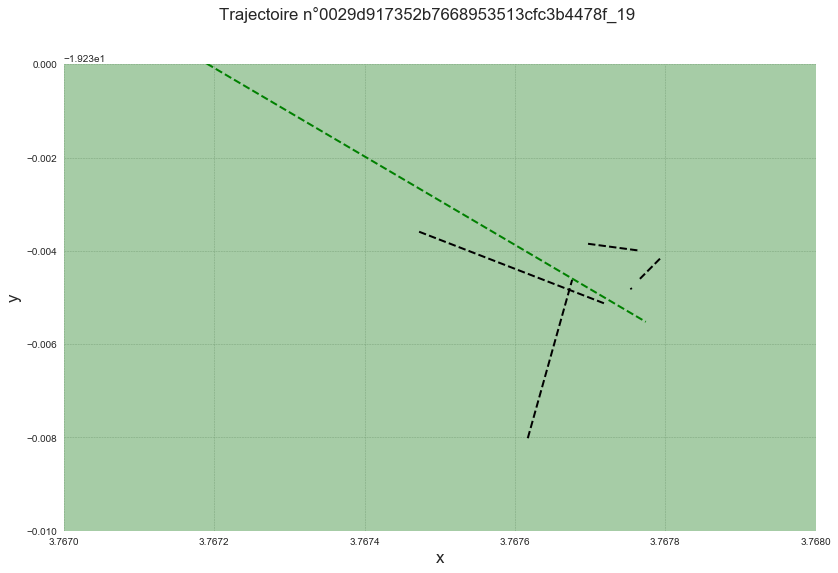

In [249]:
# libraries
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Plot
plt.style.use('bmh')
fig1 = plt.figure()
plt.xlabel('x')
plt.ylabel('y')

fig1.set_figheight(8)
fig1.set_figwidth(12)
ax1 = fig1.add_subplot(111)
#ax1.plot( 'x_entry', 'y_entry', data=d, linestyle='none', marker='o')
ax1.set_xlim([3.767,3.768])
ax1.set_ylim([-19.24,-19.23])

#ax1.set_xlim([(min([x_entry.min()[0],x_exit.min()[0]]))/1000000-0.01, (max([x_entry.max()[0],x_exit.max()[0]]))/1000000+0.01])
#ax1.set_ylim([(min([y_entry.min()[0],y_exit.min()[0]]))/1000000-0.01, (max([y_entry.max()[0],y_exit.max()[0]]))/1000000+0.01])
# Add rectangle
for i in range(len(x_entry)):
    if(i==0):
        #cl='red'
        cl="black"
        #ax1.plot(((x_exit.values)[i][0])/1000000,((y_exit.values)[i][0])/1000000,'s')
    elif(i==len(x_entry)-2):
        ax1.plot(((x_entry.values)[i][0])/1000000,((y_entry.values)[i][0])/1000000,'s')
        cl='green'
    else:
        cl="black"
    #ax1.arrow(((x_entry.values)[i][0])/1000000,  ((y_entry.values)[i][0])/1000000,((x_exit.values)[i][0])/1000000, ((y_exit.values)[i][0])/1000000,head_width=0.0001, head_length=0.001, fc='k', ec='k')
    ax1.plot([((x_entry.values)[i][0])/1000000, ((x_exit.values)[i][0])/1000000], [((y_entry.values)[i][0])/1000000, ((y_exit.values)[i][0])/1000000], color=cl, lw=2, linestyle='--')

ax1.add_patch(
patches.Rectangle(
(3.7509015068, -19.2089056133), # (x,y)
# (d.min()[0], d.min()[1]), # (x,y)
0.02, # width
-0.06, # height
# You can add rotation as well with 'angle'
alpha=0.3, facecolor="green", edgecolor="black", linewidth=3, linestyle='solid'
)
)
fig1.suptitle("Trajectoire n°0029d917352b7668953513cfc3b4478f_19")
plt.savefig('trajectoire2.png', bbox_inches='tight')


In [22]:
d.min()[0]

3.749042301223842

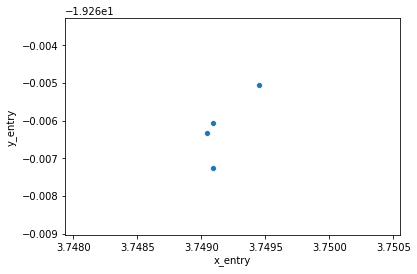

In [162]:
import seaborn as sns;
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="x_entry", y="y_entry", data=d)

In [278]:
exit_coor.iloc[0]

x_exit    3.749610e+06
y_exit   -1.926594e+07
Name: 1, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
i=0
name = ['Lightgbm','XGBoost','CatBoost']
for model in [LGBM,XGB,CatBoost]:
    model.fit(X,Y)
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])
    feature_imp = feature_imp.sort_values(by="Value", ascending=False)
    feature_imp = feature_imp.head(20)

    plt.figure(figsize=(20, 10))
    plt.xscale('log')
    sns.barplot(x="Value", y="Feature", data=feature_imp)
    try : 
        plt.title(name[i]+' Features Importances')
    except AttributeError:
        print(name[i])
    plt.tight_layout()
    try:
        plt.savefig(name[i]+'_log_importances.png')
    except AttributeError:
        print(name[i])
    plt.show()
    i+=1

# GridSearch


In [11]:

print(datetime.datetime.now())
X = X
y = Y.astype(int)
param_grid = {
    'n_estimators': [2000,6000],
    'task_type': ['GPU'],
    'eval_metric': ['F1'],
    'learning_rate': [0.001,0.01,0.1],
    'max_depth': [7,9],
    'random_strength' : [1,10],
    'scale_pos_weight' : [3,10],
    'bagging_temperature' : [0.5,1]
}

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
model = GridSearchCV(CatBoostClassifier(),param_grid, cv=kf.split(X, y),verbose=3, scoring= 'f1',iid=True)
model.fit(X,y)

print(model.best_score_)
print(model.best_params_)

print(datetime.datetime.now())

pickle.dump(model,open('CatBoost_tuned_v1','wb'))

# Mano Mano

In [9]:
X = X
y = Y.astype(int)

scores = []
iterations = []
skf = StratifiedKFold(n_splits=5,random_state=1)
kfold=1
for train_index, test_index in skf.split(X, y):
    print('K-Fold : ',kfold)
    kfold+=1
    t1 = datetime.datetime.now()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_dataset = Pool(data=X_train,
                     label=y_train)

    eval_dataset = Pool(data=X_test,
                        label=y_test)

    clf = CatBoostClassifier(n_estimators=2500,max_depth=6,task_type = "GPU",random_strength=7,bagging_temperature=0.7,eval_metric='F1',silent=True)
    clf.fit(train_dataset, use_best_model=True,eval_set=eval_dataset)
    
    pred = clf.predict(X_test)
    score = f1_score(y_test.values.astype(int),pred.astype(int))
    scores.append(score)
    iterations.append(clf.best_iteration_)
    print('f1_score',score)
    print('elapsed : ',(datetime.datetime.now()-t1))

print('best score : ',np.mean(scores))
print('best iterations : ',max(iterations))

K-Fold :  1
f1_score 0.8904964539007093
elapsed :  0:00:45.066961
K-Fold :  2
f1_score 0.8861046223543568
elapsed :  0:00:45.678135
K-Fold :  3
f1_score 0.8901504399659381
elapsed :  0:00:45.719829
K-Fold :  4
f1_score 0.8912676056338028
elapsed :  0:00:45.219809
K-Fold :  5
f1_score 0.8897581792318635
elapsed :  0:00:44.384237
best score :  0.8895554602173341
best iterations :  1921


In [ ]:
CatBoostClassifier(n_estimators=3000,max_depth=6,task_type = "GPU",random_strength=7,bagging_temperature=0.7,eval_metric='F1',silent=True)
    
best score :  0.8895554602173341
best iterations :  1921